In [11]:
from metakan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = MultKAN(width=[2,5,1], grid=3, k=3, seed=12, device=device, embedding_dim=1, hidden_dim=16)

cuda
checkpoint directory created: ./model
saving model version 0.0


In [14]:

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)

dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

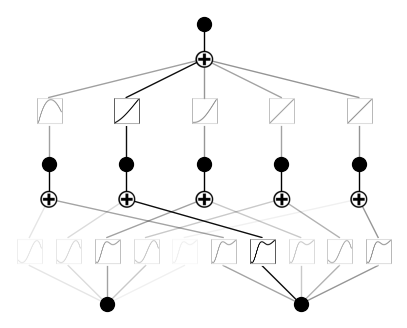

In [15]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot()

In [16]:
# train the model
model.fit(dataset, opt="LBFGS", steps=120, lamb=0.001, update_grid=False);


| train_loss: 1.83e-02 | test_loss: 1.75e-02 | reg: 5.84e+00 | : 100%|█| 120/120 [00:24<00:00,  4.81

saving model version 0.1


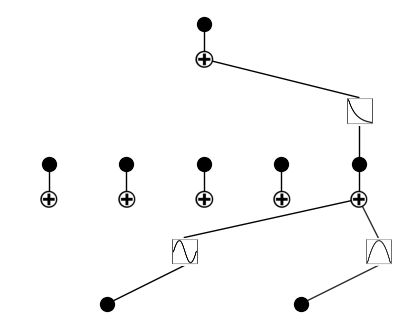

In [17]:
model.plot()

saving model version 0.2


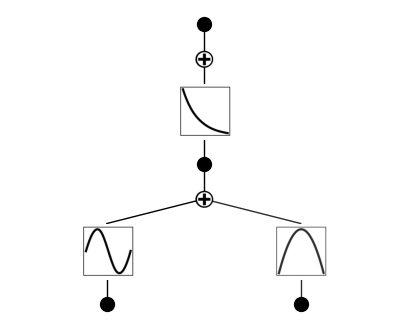

In [18]:
model = model.prune()
model.plot()